In [1]:
!gdown --id 1gOIuzA7enzjm-l3pIhNjhTC2LORb2zCl
!unzip tobeopen.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1gOIuzA7enzjm-l3pIhNjhTC2LORb2zCl
To: /content/tobeopen.zip
100% 773k/773k [00:00<00:00, 113MB/s]
Archive:  tobeopen.zip
  inflating: tobeopen/0 (1).jpg      
  inflating: tobeopen/0 (10).jpg     
  inflating: tobeopen/0 (11).jpg     
  inflating: tobeopen/0 (12).jpg     
  inflating: tobeopen/0 (13).jpg     
  inflating: tobeopen/0 (14).jpg     
  inflating: tobeopen/0 (15).jpg     
  inflating: tobeopen/0 (16).jpg     
  inflating: tobeopen/0 (17).jpg     
  inflating: tobeopen/0 (18).jpg     
  inflating: tobeopen/0 (19).jpg     
  inflating: tobeopen/0 (2).jpg      
  inflating: tobeopen/0 (20).jpg     
  inflating: tobeopen/0 (21).jpg     
  inflating: tobeopen/0 (22).jpg     
  inflating: tobeopen/0 (23).jpg 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from PIL import ImageOps
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [3]:
Im_flat = np.zeros((960, 28*18)) #--> X set
target = np.zeros((960)) #--> y set
cnt = 0
new_size = (18, 28)

path = '/content/tobeopen'
# for i in range(10):
ls = os.listdir(path)
for image_path in ls:
  os.chdir(path)
  Im = Image.open(image_path)
  out = Im.resize(new_size)
  gray_image = ImageOps.grayscale(out)
  im_np = np.array(gray_image)
  Im_flat[cnt,:] = im_np.reshape(-1)
  target[cnt] = image_path[0]
  cnt += 1

In [4]:
X_train,X_test,y_train,y_test=train_test_split(Im_flat,target,test_size=0.3)
model = KNeighborsClassifier(n_neighbors=5,algorithm='brute', p=2)

In [5]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [6]:
klist = np.arange(1,13)
plist = [1,2,3,np.inf]

for i in plist:
  print('here p is',i)
  for j in klist:
    knn = KNeighborsClassifier(n_neighbors=j , p=i)
    score = cross_val_score(knn, X_train,y_train,cv=5,scoring = 'accuracy')
    print(score.mean())

here p is 1
0.9925704809286898
0.9762189054726369
0.9836484245439469
0.971730237700387
0.965771144278607
0.9568711995577669
0.9583416252072968
0.9523825317855168
0.9479270315091209
0.940497512437811
0.9449640685461581
0.9255942509673852
here p is 2
1.0
0.9925594250967386
0.9925594250967386
0.9791818684355998
0.977689331122167
0.9732448866777226
0.9702598120508569
0.9628081813156439
0.9613156440022111
0.9538750690989497
0.9508899944720841
0.9464344941956883
here p is 3
1.0
0.99404090657822
0.99404090657822
0.9836263128800441
0.9850967385295745
0.9806412382531784
0.9821337755666113
0.973200663349917
0.9687341072415698
0.96873410724157
0.9642786069651741
0.9627971254836926
here p is inf
0.9672747374239912
0.9613266998341625
0.9613045881702597
0.9598231066887782
0.9568601437258154
0.9479159756771697
0.9464234383637369
0.9434494195688226
0.9404864566058595
0.9389939192924268
0.9330127142067439
0.9345052515201768


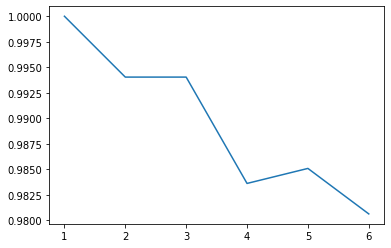

In [7]:
klist = np.arange(1,7)
dic = {}
for j in klist:
  knn = KNeighborsClassifier(n_neighbors=j , p=3)
  score = cross_val_score(knn, X_train,y_train,cv=5,scoring = 'f1_micro')
  dic[j] = score.mean()
k = [i for i in dic.keys()]
sc = [j for j in dic.values()]
plt.plot(k,sc)

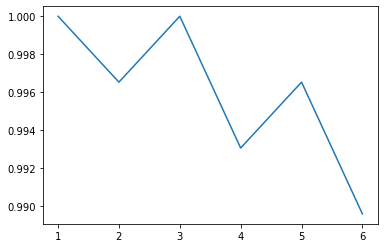

In [8]:
from sklearn.metrics import accuracy_score
klist = np.arange(1,7)
dic = {}
for j in klist:
  knn = KNeighborsClassifier(n_neighbors=j , p=3)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  score = accuracy_score(y_test,y_pred)
  dic[j] = score
k = [i for i in dic.keys()]
sc = [j for j in dic.values()]
plt.plot(k,sc)

In [9]:
# THE LAST K (=6) IS THE BEST
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       1.00      1.00      1.00        24
         2.0       1.00      0.91      0.95        22
         3.0       0.92      1.00      0.96        35
         4.0       1.00      0.96      0.98        25
         5.0       1.00      1.00      1.00        33
         6.0       1.00      1.00      1.00        26
         7.0       1.00      1.00      1.00        33
         8.0       1.00      1.00      1.00        31
         9.0       1.00      1.00      1.00        28

    accuracy                           0.99       288
   macro avg       0.99      0.99      0.99       288
weighted avg       0.99      0.99      0.99       288



In [10]:
modelNB = GaussianNB()
modelNB.fit(X_train,y_train)
y_pred = modelNB.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       1.00      1.00      1.00        24
         2.0       1.00      0.86      0.93        22
         3.0       0.76      1.00      0.86        35
         4.0       1.00      0.76      0.86        25
         5.0       1.00      1.00      1.00        33
         6.0       1.00      1.00      1.00        26
         7.0       1.00      0.94      0.97        33
         8.0       1.00      1.00      1.00        31
         9.0       1.00      1.00      1.00        28

    accuracy                           0.96       288
   macro avg       0.98      0.96      0.96       288
weighted avg       0.97      0.96      0.96       288



In [11]:
modelNB.score(X_test,y_test)

0.9618055555555556

In [13]:
os.chdir('/content/TEST')
Im = Image.open('8 (425).jpg')
out = Im.resize(new_size)
gray_image = ImageOps.grayscale(out)
X_val = np.array(gray_image)
X_val=X_val.reshape(1,504)
y_val =model.predict(X_val)
y_val

array([8.])